<a href="https://colab.research.google.com/github/Alishapunw/Data-Science-Bootcamp/blob/Master---Homework-Assignments/PracticeAssignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

Q1. Preprocess Test data and get predictions


In [6]:
data = pd.read_csv("train.csv")
# create another copy of dataset and append encoded features to it
data = data.drop(columns=['id', 'timestamp','country'])
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()
data = data.dropna()


data_train = data.copy()
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

reg=LinearRegression()
reg.fit(X_train, y_train)
#
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
y_pred

Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


array([6509.31045335, 7102.45935298, 7752.40568462, ..., 7921.3387178 ,
       6694.48662105, 6956.59394761])

Q2. Compute Mean Abolute Error, Mean Square error for test data

In [7]:
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

846.0609247170622 1205.8359987872284


Q3. Implement Ridge and Lasso Regression and then compute the following metrics on test data

846.729532269542 1206.6804123100553
Ridge Predicted values  [6509.71 7099.6  7756.67]
Ridge Real values       119     6301.452833
1153    7166.000000
4079    7166.000000
Name: salary, dtype: float64


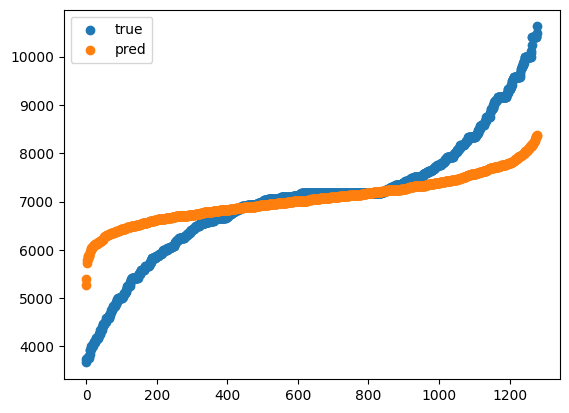

In [20]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Y_pred = clf.predict( X_test )
print(mean_absolute_error(y_test,Y_pred), mean_squared_error(y_test,Y_pred)**0.5)
print( "Ridge Predicted values ", np.round( Y_pred[:3], 2 ) )
print( "Ridge Real values      ", y_test[:3] )

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

Lasso Predicted values  [6555.24 7087.74 7756.27]
Lasso Real values       119     6301.452833
1153    7166.000000
4079    7166.000000
Name: salary, dtype: float64
849.5965913739591 1209.99781929386


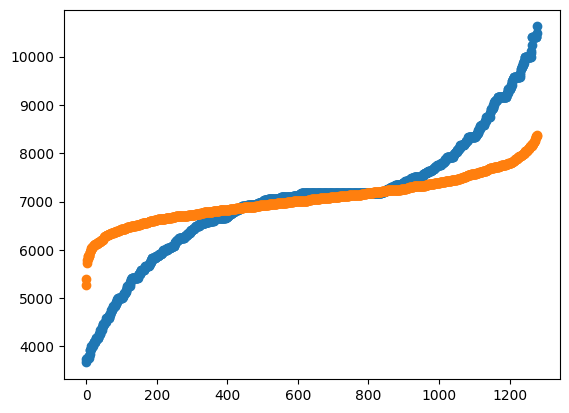

In [21]:
from sklearn.linear_model import Lasso
clf1 = Lasso(alpha=1.0)
clf1.fit(X_train, y_train)
Y_pred = clf1.predict( X_test )
print( "Lasso Predicted values ", np.round( Y_pred[:3], 2 ) )
print( "Lasso Real values      ", y_test[:3] )
print(mean_absolute_error(y_test,Y_pred), mean_squared_error(y_test,Y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

Q4. Trees:
Compute errors on test sets

In [26]:
# train Decision Tree regression model
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))
mean_absolute_error(y_test,decisiontree.predict(X_test))
test_error


[886.721277041351,
 875.9496892579626,
 875.1595478582299,
 869.6643625981122,
 869.4982107237529,
 855.2148512660765,
 865.0658340754102,
 862.8990648671587,
 860.8876315699832,
 876.136388589876,
 880.466233369006,
 897.8339720956233]

Q5. Play with different parameter of decision trees and random forests and see the impact on train and test error

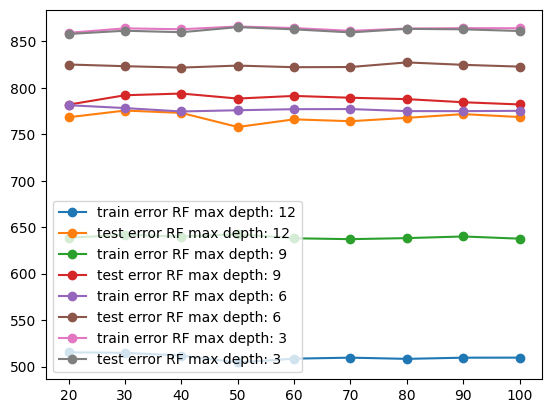

In [38]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error RF max depth: 12')
plt.plot(N_estimator,test_error,marker='o',label = 'test error RF max depth: 12')
plt.legend()

max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 9, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error RF max depth: 9')
plt.plot(N_estimator,test_error,marker='o',label = 'test error RF max depth: 9')
plt.legend()

max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 6, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error RF max depth: 6')
plt.plot(N_estimator,test_error,marker='o',label = 'test error RF max depth: 6')
plt.legend()


max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 3, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error RF max depth: 3')
plt.plot(N_estimator,test_error,marker='o',label = 'test error RF max depth: 3')
plt.legend()


Decision Tree Output:


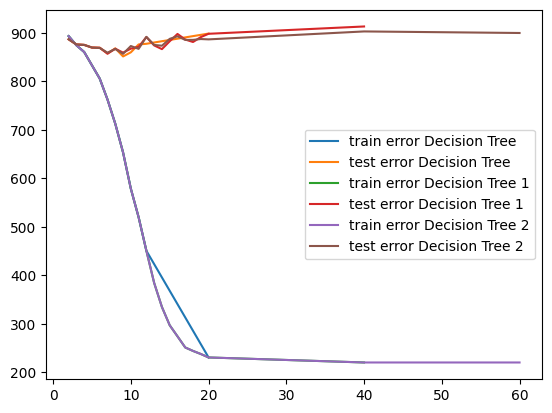

In [43]:
# ************************************ Decision Tree ****************************
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree1 = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree1.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree1.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree1.predict(X_test)))

print("Decision Tree Output:")
plt.plot(max_depth_list,train_error,label = 'train error Decision Tree')
plt.plot(max_depth_list,test_error,label = 'test error Decision Tree')
plt.legend()

max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,40]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree1 = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree1.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree1.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree1.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error Decision Tree 1')
plt.plot(max_depth_list,test_error,label = 'test error Decision Tree 1')
plt.legend()

max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,40,60]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree1 = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree1.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree1.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree1.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error Decision Tree 2')
plt.plot(max_depth_list,test_error,label = 'test error Decision Tree 2')
plt.legend()

Q6. [OPTIONAL] implement cross validation and get best hyperparameters

In [49]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.13416194 0.15064559 0.14125824 0.1182889  0.1287021  0.0624076
 0.17087647 0.10818134 0.09318098 0.14511975]
Average CV Score:  0.12528229068266813
Number of CV Scores used in Average:  10
